# Naive Bayes with sklearn

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

df = pd.read_csv("C:/Users/trist/Documents/Cours/L3_MIASHS/Compléments_maths/S2/Projet/spotifyMusicGenresClean.csv")
df.head()

,genre,danceability,duration_ms,instrumentalness,key,liveness,speechiness,tempo,mode,valence
0,Rock,0.626561,0.418905,0.003211,10,0.031140,0.064748,0.384348,0,0.173305
1,Rock,0.303303,0.241046,0.000000,1,0.084078,0.107696,0.639850,1,0.215285
2,Rock,0.506360,0.312728,0.000080,0,0.077308,0.068672,0.589810,1,0.228202
3,Rock,0.452678,0.416564,0.006166,1,0.061197,0.023763,0.729532,1,0.589882
4,Rock,0.691913,0.111424,0.000000,8,0.122665,0.074559,0.413965,1,0.822390


In [2]:
y = df.genre.values

categorical_variables = ["mode", "key"]
quantitative_variables = ["danceability","duration_ms","instrumentalness","liveness","speechiness","tempo","valence"]

X = df[categorical_variables + quantitative_variables].values
X_quantitative = df[quantitative_variables].values
X_categorical = df[categorical_variables].values


## Working with quantitative data

In [4]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report

In [5]:
gaussian_nb = GaussianNB()

print("======= Training")
gaussian_nb.fit(X_quantitative, y)

print("======= Prediction")
predictions = gaussian_nb.predict(X_quantitative)

print("======= Results")
print(classification_report(y, predictions))

======= Training
======= Prediction
======= Results
              precision    recall  f1-score   support

   Classical       0.94      0.96      0.95        48
     Country       0.47      0.83      0.60        48
         EDM       0.72      0.46      0.56        50
         Rap       0.79      0.58      0.67        38
        Rock       0.41      0.32      0.36        50

    accuracy                           0.63       234
   macro avg       0.66      0.63      0.63       234
weighted avg       0.66      0.63      0.62       234



In [6]:
predictions = gaussian_nb.predict_proba(X_quantitative)

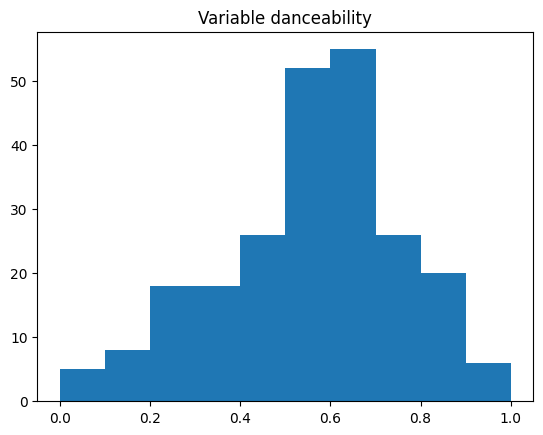

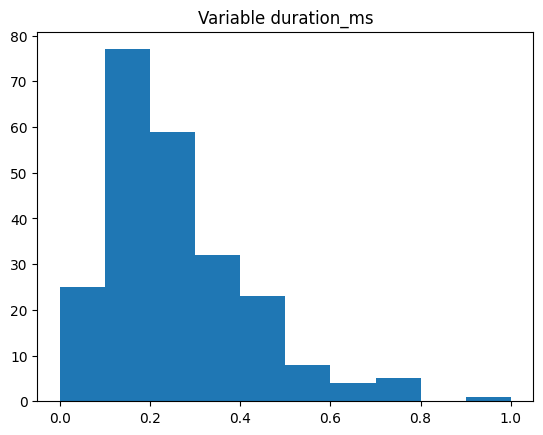

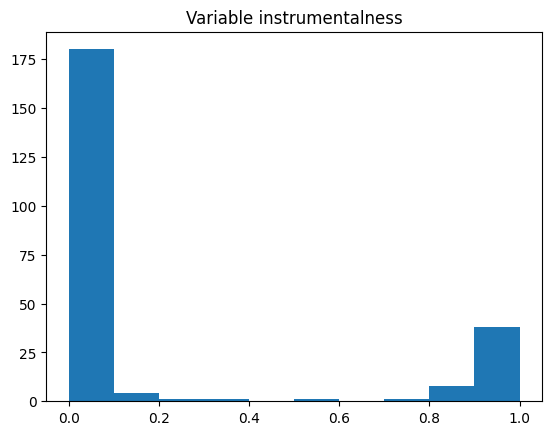

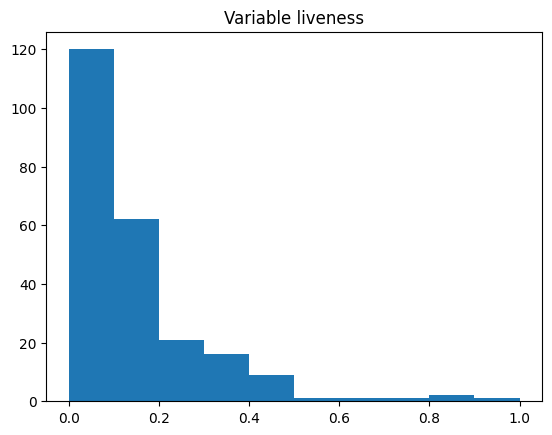

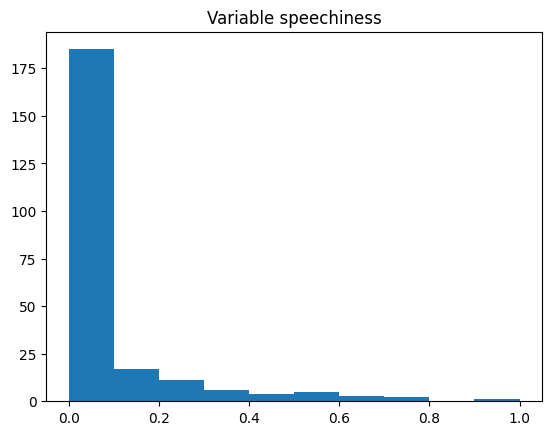

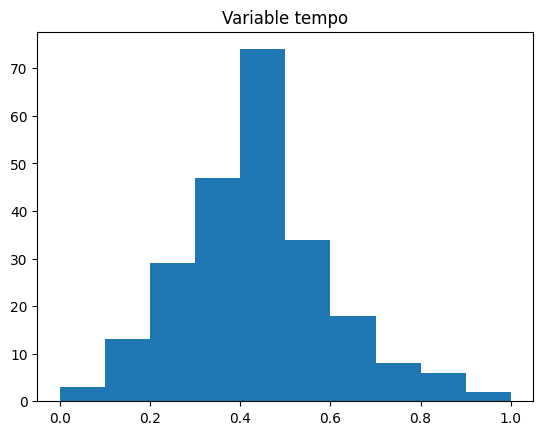

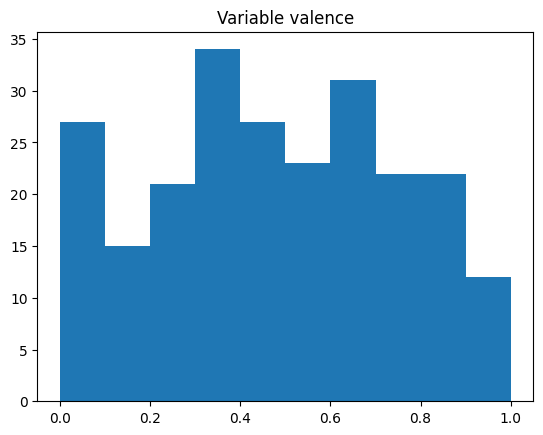

In [7]:
for ix, var in enumerate(X_quantitative.T):
    plt.hist(var)
    plt.title(f"Variable {quantitative_variables[ix]}")
    plt.show()

In [56]:
gaussian_nb = GaussianNB()
gaussian_nb.fit(X_quantitative,y)
predictions = gaussian_nb.predict(X_quantitative)

<Axes: >

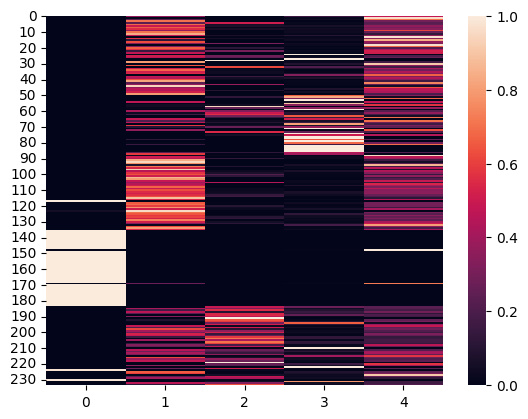

In [8]:
predicted_proba = gaussian_nb.predict_proba(X_quantitative)
sns.heatmap(predicted_proba)

In [9]:
X_quantitative

array([[6.26560859e-01, 4.18905123e-01, 3.21063395e-03, ...,
        6.47482014e-02, 3.84348263e-01, 1.73304629e-01],
       [3.03302602e-01, 2.41046174e-01, 0.00000000e+00, ...,
        1.07695662e-01, 6.39850273e-01, 2.15285253e-01],
       [5.06360135e-01, 3.12728294e-01, 7.95501022e-05, ...,
        6.86723349e-02, 5.89810329e-01, 2.28202368e-01],
       ...,
       [6.79075738e-01, 1.36866629e-01, 3.07770961e-06, ...,
        2.65315021e-01, 3.23909906e-01, 2.13132400e-01],
       [6.82576730e-01, 7.70019668e-02, 1.63599182e-04, ...,
        9.15631131e-03, 4.85529842e-01, 6.40473628e-01],
       [7.00081690e-01, 1.50704786e-01, 0.00000000e+00, ...,
        7.17244386e-02, 4.78468715e-01, 6.22174381e-01]])

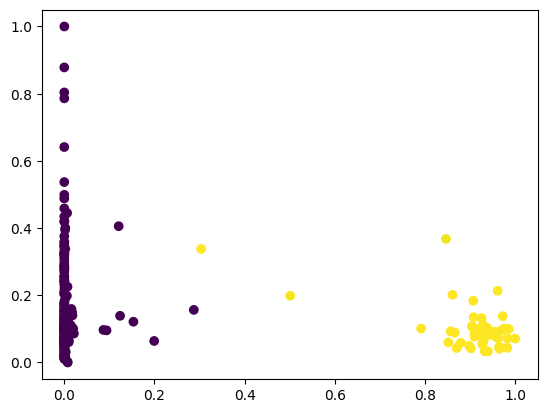

In [10]:
predicted_proba = gaussian_nb.predict_proba(X_quantitative)
plt.scatter(X_quantitative[:,2], X_quantitative[:,3],c=predicted_proba[:,0])

In [11]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import cross_val_predict

gaussian_nb = GaussianNB()

print(f"== Working with accuracy")

scores = cross_val_score(estimator=gaussian_nb, X=X_quantitative, y=y)
print(f"Mean accuracy: {np.mean(scores)}")
print(f"Median accuracy: {np.median(scores)}")


y_pred = cross_val_predict(estimator=gaussian_nb, X=X_quantitative, y=y)

# Calculer la précision et le rappel par classe

print(f"== Working with precision")

precision = precision_score(y, y_pred, average=None)

print(f"Mean precision: {np.mean(precision)}")
print(f"Median precision: {np.median(precision)}")

print(f"== Working with recall")

recall = recall_score(y, y_pred, average=None)

print(f"Mean recall: {np.mean(recall)}")
print(f"Median recall: {np.median(recall)}")


== Working with accuracy
Mean accuracy: 0.4959296947271046
Median accuracy: 0.5319148936170213
== Working with precision
Mean precision: 0.5555328798185941
Median precision: 0.6333333333333333
== Working with recall
Mean recall: 0.4996666666666668
Median recall: 0.5


## Working with qualitative data

In [12]:
from sklearn.naive_bayes import CategoricalNB
from sklearn.preprocessing import LabelEncoder

In [13]:
encoder = LabelEncoder()
encoded_vars = []
for category in X_categorical.T:
    encoded_vars.append(encoder.fit_transform(category))

In [14]:
X_cat = np.array(encoded_vars).T

In [15]:
gaussian_nb_categorical = CategoricalNB()

print("======= Training")
gaussian_nb_categorical.fit(X_cat, y)

print("======= Prediction")
predictions = gaussian_nb_categorical.predict(X_cat)

print("======= Results")
print(classification_report(y, predictions))

======= Training
======= Prediction
======= Results
              precision    recall  f1-score   support

   Classical       0.36      0.40      0.38        48
     Country       0.38      0.48      0.42        48
         EDM       0.40      0.54      0.46        50
         Rap       0.43      0.16      0.23        38
        Rock       0.46      0.36      0.40        50

    accuracy                           0.40       234
   macro avg       0.41      0.39      0.38       234
weighted avg       0.41      0.40      0.39       234



In [32]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score

gaussian_nb = CategoricalNB()

print(f"== Working with accuracy")

scores = cross_val_score(estimator=gaussian_nb, X=X_cat, y=y)
print(f"Mean accuracy: {np.mean(scores)}")
print(f"Median accuracy: {np.median(scores)}")


== Working with accuracy
Mean accuracy: 0.2649398704902868
Median accuracy: 0.2765957446808511


In [17]:
X_quantitative

array([[6.26560859e-01, 4.18905123e-01, 3.21063395e-03, ...,
        6.47482014e-02, 3.84348263e-01, 1.73304629e-01],
       [3.03302602e-01, 2.41046174e-01, 0.00000000e+00, ...,
        1.07695662e-01, 6.39850273e-01, 2.15285253e-01],
       [5.06360135e-01, 3.12728294e-01, 7.95501022e-05, ...,
        6.86723349e-02, 5.89810329e-01, 2.28202368e-01],
       ...,
       [6.79075738e-01, 1.36866629e-01, 3.07770961e-06, ...,
        2.65315021e-01, 3.23909906e-01, 2.13132400e-01],
       [6.82576730e-01, 7.70019668e-02, 1.63599182e-04, ...,
        9.15631131e-03, 4.85529842e-01, 6.40473628e-01],
       [7.00081690e-01, 1.50704786e-01, 0.00000000e+00, ...,
        7.17244386e-02, 4.78468715e-01, 6.22174381e-01]])

In [18]:
from sklearn.preprocessing import KBinsDiscretizer

kbins_discretizer = KBinsDiscretizer(n_bins=3)
discrete_vars = kbins_discretizer.fit_transform(X_quantitative).todense()

X_quanti_discrete = np.hstack([discrete_vars, X_cat])

gaussian_nb = CategoricalNB()

scores = cross_val_score(estimator=gaussian_nb, X=X_cat, y=y)
print(f"Mean accuracy: {np.mean(scores)}")
print(f"Median accuracy: {np.median(scores)}")

Mean accuracy: 0.2649398704902868
Median accuracy: 0.2765957446808511


## Working with both data types

In [19]:
gaussian_nb_quanta = GaussianNB()
gaussian_nb_quanta.fit(X_quantitative, y)
gaussian_nb_categorical = CategoricalNB()
gaussian_nb_categorical.fit(X_cat, y)

gaussian_full = GaussianNB()
proba_matrix = np.concatenate([gaussian_nb_quanta.predict_proba(X_quantitative)[:,0].reshape(-1,1), gaussian_nb_categorical.predict_proba(X_cat)[:,0].reshape(-1, 1)], axis=1)
gaussian_full.fit(proba_matrix, y)

print("===== Accuracy using full dataset")
gaussian_full.score(proba_matrix, y)

===== Accuracy using full dataset


0.41452991452991456

In [20]:
# Next step to do: use train / test or cross val approach using this method.

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_quantitative, y, test_size=0.3, stratify=y)

In [23]:
gaussian_nb = GaussianNB()

print("======= Training")
gaussian_nb.fit(X_train, y_train)

print("======= Prediction")
predictions = gaussian_nb.predict(X_test)

print("======= Results")
print(classification_report(y_test, predictions))

======= Training
======= Prediction
======= Results
              precision    recall  f1-score   support

   Classical       0.88      1.00      0.94        15
     Country       0.34      0.73      0.47        15
         EDM       0.75      0.20      0.32        15
         Rap       0.83      0.45      0.59        11
        Rock       0.42      0.33      0.37        15

    accuracy                           0.55        71
   macro avg       0.65      0.54      0.54        71
weighted avg       0.63      0.55      0.53        71



In [26]:
gaussian_nb = GaussianNB()
gaussian_nb.fit(X_train,y_train)
predictions = gaussian_nb.predict(X_test)

print(f"== Working with accuracy")

scores = cross_val_score(estimator=gaussian_nb, X=X_test, y=y_test)
print(f"Mean accuracy: {np.mean(scores)}")
print(f"Median accuracy: {np.median(scores)}")


y_pred = cross_val_predict(estimator=gaussian_nb, X=X_test, y=y_test)

# Calculer la précision et le rappel par classe

print(f"== Working with precision")

precision = precision_score(y_test, y_pred, average=None)

print(f"Mean precision: {np.mean(precision)}")
print(f"Median precision: {np.median(precision)}")

print(f"== Working with recall")

recall = recall_score(y_test, y_pred, average=None)

print(f"Mean recall: {np.mean(recall)}")
print(f"Median recall: {np.median(recall)}")

== Working with accuracy
Mean accuracy: 0.5066666666666666
Median accuracy: 0.5
== Working with precision
Mean precision: 0.519888888888889
Median precision: 0.4444444444444444
== Working with recall
Mean recall: 0.5139393939393939
Median recall: 0.4666666666666667


In [84]:
print(y_test)
print("-------")
print(y_pred)

['Rock' 'Country' 'Rock' 'Classical' 'EDM' 'Rap' 'Rock' 'EDM' 'EDM'
 'Country' 'Classical' 'Rap' 'Country' 'Country' 'EDM' 'Rap' 'EDM' 'Rock'
 'Rock' 'Country' 'Country' 'EDM' 'Rock' 'Rock' 'Country' 'Classical'
 'Classical' 'Rap' 'Rock' 'Rap' 'EDM' 'Classical' 'Rap' 'Country'
 'Classical' 'Classical' 'Rap' 'EDM' 'EDM' 'Country' 'Rock' 'Rock'
 'Country' 'EDM' 'Country' 'EDM' 'Rap' 'Rap' 'Country' 'EDM' 'Rock' 'EDM'
 'Country' 'Classical' 'Rap' 'Rap' 'EDM' 'Classical' 'Classical'
 'Classical' 'Rock' 'Classical' 'EDM' 'Classical' 'Country' 'Rock'
 'Classical' 'Country' 'Classical' 'Rock' 'Rock']
-------
['Country' 'Country' 'Country' 'Classical' 'Country' 'Rock' 'Country'
 'Classical' 'Rap' 'Country' 'Classical' 'Country' 'Rock' 'Classical'
 'Country' 'Rap' 'Rock' 'Country' 'Country' 'Country' 'Rock' 'Rock'
 'Country' 'Country' 'Country' 'Classical' 'Classical' 'Rock' 'Rock'
 'Country' 'Rock' 'Classical' 'Country' 'Country' 'Classical' 'Classical'
 'Rap' 'Country' 'Rock' 'Rock' 'Country'

In [27]:
encoder = LabelEncoder()
encoded_vars = []
for category in X_categorical.T:
    encoded_vars.append(encoder.fit_transform(category))
X_cat = np.array(encoded_vars).T

In [28]:
# Train/test avec les variables categorielles

X_train2, X_test2, y_train2, y_test2 = train_test_split(X_cat, y, test_size=0.3, stratify=y)

In [87]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score

gaussian_nb_categorical = CategoricalNB()

print("======= Training")
gaussian_nb_categorical.fit(X_train2, y_train2)

print("======= Prediction")
predictions = gaussian_nb_categorical.predict(X_test2)

print("======= Results")
print(classification_report(y_test2, predictions))


======= Training
======= Prediction
======= Results
              precision    recall  f1-score   support

   Classical       0.43      0.20      0.27        15
     Country       0.38      0.33      0.36        15
         EDM       0.41      0.47      0.44        15
         Rap       0.22      0.18      0.20        11
        Rock       0.20      0.33      0.25        15

    accuracy                           0.31        71
   macro avg       0.33      0.30      0.30        71
weighted avg       0.34      0.31      0.31        71



In [29]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score

gaussian_nb = CategoricalNB()
gaussian_nb.fit(X_train2,y_train2)
predictions = gaussian_nb.predict(X_test2)

print(f"== Working with accuracy")

scores = cross_val_score(estimator=gaussian_nb, X=X_test2, y=y_test2)
print(f"Mean accuracy: {np.mean(scores)}")
print(f"Median accuracy: {np.median(scores)}")

y_pred = cross_val_predict(estimator=gaussian_nb, X=X_test2, y=y_test2)

# Calculer la précision et le rappel par classe

print(f"== Working with precision")

precision = precision_score(y_test2, y_pred, average=None)

print(f"Mean precision: {np.mean(precision)}")
print(f"Median precision: {np.median(precision)}")

print(f"== Working with recall")

recall = recall_score(y_test2, y_pred, average=None)

print(f"Mean recall: {np.mean(recall)}")
print(f"Median recall: {np.median(recall)}")


== Working with accuracy
Mean accuracy: 0.24
Median accuracy: 0.21428571428571427
== Working with precision
Mean precision: 0.17741176470588238
Median precision: 0.24
== Working with recall
Mean recall: 0.22666666666666666
Median recall: 0.3333333333333333


In [88]:
y_test2

array(['Classical', 'Country', 'Rock', 'Country', 'Rock', 'Rock', 'Rap',
       'EDM', 'Rap', 'EDM', 'Country', 'Rap', 'Rap', 'Classical',
       'Classical', 'Classical', 'Rap', 'Classical', 'Classical', 'Rap',
       'Rap', 'Country', 'Country', 'EDM', 'Classical', 'EDM',
       'Classical', 'Rap', 'EDM', 'EDM', 'Rock', 'EDM', 'Country',
       'Country', 'Country', 'Classical', 'EDM', 'EDM', 'EDM',
       'Classical', 'Rap', 'Classical', 'Rock', 'Rap', 'Classical',
       'Country', 'Country', 'EDM', 'Rock', 'Classical', 'Rock',
       'Country', 'Country', 'EDM', 'EDM', 'Rock', 'Rock', 'Country',
       'EDM', 'Rock', 'Country', 'Rock', 'Rock', 'Rock', 'Classical',
       'Classical', 'EDM', 'Rock', 'Rap', 'Rock', 'Country'], dtype=object)

In [31]:
#Train / test with full dataset 

X_trainc, X_testc, X_trainq, X_testq, y_train, y_test = train_test_split(X_cat, X_quantitative, y, test_size=0.3, stratify=y)

gaussian_nb_quanta = GaussianNB()
gaussian_nb_quanta.fit(X_trainq, y_train)
gaussian_nb_categorical = CategoricalNB()
gaussian_nb_categorical.fit(X_trainc, y_train)


gaussian_full = GaussianNB()
proba_matrix = np.concatenate([gaussian_nb_quanta.predict_proba(X_testq)[:,0].reshape(-1,1), gaussian_nb_categorical.predict_proba(X_testc)[:,0].reshape
                               (-1, 1)], axis=1)
gaussian_full.fit(proba_matrix, y_test)

print("===== Accuracy using full dataset")
print(gaussian_full.score(proba_matrix, y_test))

===== Accuracy using full dataset
0.49295774647887325
